# Introduction of this report
   This report makes some investagations of the titanic dataset. It can be divided into three parts:       
   ** 1. Some overall descrpitions of the dataset.**    
   ** 2. Investigations of correlations between wheather passengers survived or not and some other variables. **  
   ** 3. Investigating the difference of age distributions in three passenger classes **  

## 1. Overall descrpitions of the dataset

First, I load the csv file into a pandas dataframe. Here is the code:

In [114]:
import pandas as pd
titanic_df = pd.read_csv('D:\UDACITY\\titanic-data.csv')
print len(titanic_df)

891


In [115]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that there are 891 passengers' messages in the dataset.And we know what the dataframe looks like.  
  
Now let's have an overview for the dataset with three questions as follow:   
** 1、What are the proportions of passengers from three ports ? **   
** 2、What are the sex ratios of passengers ?  **  
** 3、How is the distribution of age looks like ?  **  
  
The answers of those questions as follow:

#### (1). Here are the code and result of computing the proportions of passengers from three ports:

Populating the interactive namespace from numpy and matplotlib


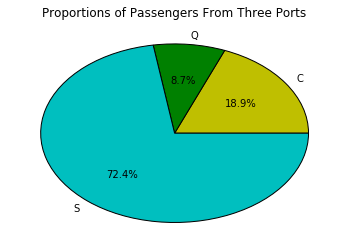

In [116]:
%pylab inline

import matplotlib.pyplot as plt

# Select passengers' id and port, and drop the records that are nan.Then compute passengers' amount from different ports.
Port_count = titanic_df[['PassengerId','Embarked']].dropna(axis=0).groupby('Embarked')['PassengerId'].count()

#Draw a pie to show the proportions of passengers from three ports
plt.pie(Port_count ,
        colors=('y', 'g', 'c'),
        labels =tuple(Port_count.index), autopct='%1.1f%%')
plt.title('Proportions of Passengers From Three Ports')
plt.show()

From the pie, we can see that most passengers came from Southampton.

#### (2). Here are code and result of computing the sex ratios of passengers:

Populating the interactive namespace from numpy and matplotlib


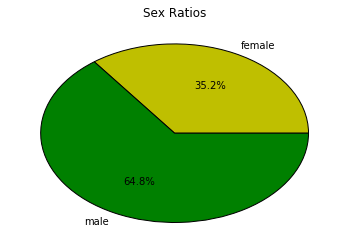

In [117]:
%pylab inline

# Select passengers' id and sex, drop the records that are nan.Then compute passengers' amount by sex.
Sex_count = titanic_df[['PassengerId','Sex']].dropna(axis=0).groupby('Sex')['PassengerId'].count()

#Draw a pie to show the sex ratios of passengers 
plt.pie(Sex_count ,
        colors=('y', 'g'),
        labels =tuple(Sex_count.index), autopct='%1.1f%%')
plt.title('Sex Ratios')
plt.show()

From the pie, we can see that there were more male passengers on board than female

#### (3). Here are code and result of computing the proportions of different pclasses:

Populating the interactive namespace from numpy and matplotlib


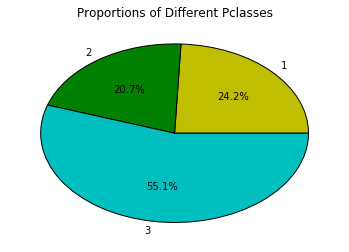

In [118]:
%pylab inline

# Select passengers' id and pclass, drop the records with nan.Then compute passengers' amount by pclass.
Pclass_count = titanic_df[['PassengerId','Pclass']].dropna(axis=0).groupby('Pclass')['PassengerId'].count()

#Draw a pie to show the sex ratios of passengers 
plt.pie(Pclass_count ,
        colors=('y', 'g','c'),
        labels =tuple(Pclass_count.index), autopct='%1.1f%%')
plt.title('Proportions of Different Pclasses')
plt.show()

From the pie, we can see that most passengers were in class 3.

#### (4). Here are code and result of computing the the distribution of age:

First, we should know the maximum and minimum ages of the passengers.

In [119]:
print 'max age: {}, min age: {}, average age: {}'.format(titanic_df['Age'].max(),titanic_df['Age'].min(),titanic_df['Age'].mean())

max age: 80.0, min age: 0.42, average age: 29.6991176471


Now, I will draw a histogram to see the distribution of age.

Populating the interactive namespace from numpy and matplotlib


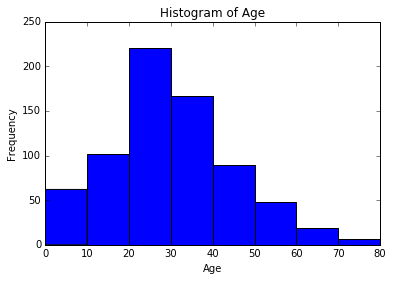

In [120]:
#Draw a histogram to show the distribution of age 
%pylab inline
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.hist(titanic_df['Age'], bins=8, range=(0,80))  # 
plt.show()

We can see that the distribution of age looks like positive skew, which means that there were more young people than old people on board.  

### Conclusion
After an oveview of the dataset. We can say 1. most passengers  embarked at Southampton. 2. There were more males on board than females. 3.most passengers were in class 3 . 4. The average age was about 30, and  passengers were generally younger.

## 2. Correlations between wheather passengers survived or not and some other variables

In order to investigate the correlations, I have four questions as follow:  
  
** 1、Was survived or not related to their age ? If so, passnegers of what age were most likely to be survived ? **   
** 2、Was survived or not related to their sex ? If so, passnegers of which sex were more likely to be survived ?  **  
** 3、Was survived or not related to passenger class ? If so, passnegers of which class were most likely to be survived ?  **  
** 4、Was survived or not related to where they embarked ? If so, passnegers embarked from which port were most likely to be survived ?  ** 
    
The answers of those questions as follow:

### (1). Here are code and result investigating the correlation between  survived or not and age.    
  
As survived or not is a categorical variable, I will use Chi-squared test to see if there is a correlation between these two variables.And set $\alpha$ level at 0.05. Here is the hypothesis:  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:\textstyle\ there\ was\ no\ correlation\ between\ survived\ or\ not\ and\ age $$
$$H_A:\textstyle\ there\ was\ a\ correlation\ between\ survived\ or\ not\ and\ age $$
  
First, I divide passengers into 8 groups by age:[0,9),[10,19),[20,29),[30,39),[40,49),[50,59),[60,69),[70,80].Then compute the sum of survived people and unsurvived people in each group, and print out the contingency table.The code and result as follow:

In [121]:
# Write a function: mapping age to the corresponding age group
def age_segment(age):
    if age >= 70 :
        return '70-80'
    elif age >=60 :
        return '60-69'
    elif age >=50 :
        return '50-59'
    elif age >=40 :
        return '40-49'
    elif age >=30 :
        return '30-39'
    elif age >=20 :
        return '20-29'
    elif age >=10 :
        return '10-19'
    elif age >=0 :
        return '0-9'  
    else:
        return None
# Combine age,segment of age, survived or not into a dataframe. Then drop records with nan. 
age_seg_tmp = pd.Series(titanic_df['Age'].dropna(axis=0).apply(age_segment),name ='Seg')  
age_seg_df = pd.concat([titanic_df[['Age', 'Survived']].dropna(axis=0),age_seg_tmp],axis=1)

# Write a function to gennerate a contingency table
def Contingency_table(df,inde_var,de_var):    
    de_var_group = df.groupby(inde_var)[de_var].sum()   
    inde_var_group = df.groupby(inde_var)[de_var].count().rename('Sum') 
    op_de_var_group = ( inde_var_group -df.groupby(inde_var)[de_var].sum()).rename('Un'+de_var)
    tmp = pd.concat([de_var_group,op_de_var_group,inde_var_group],axis=1)    
    contingency = pd.concat([tmp,pd.DataFrame([tmp.sum()],index=['Sum'])],axis=0)  
    return contingency

# Use the function to gennerate the contingency table of age segment and survived or not 
age_survived_contingency = Contingency_table(age_seg_df,'Seg','Survived')
age_survived_contingency

,Survived,UnSurvived,Sum
Seg,,,
0-9,38,24,62
10-19,41,61,102
20-29,77,143,220
30-39,73,94,167
40-49,34,55,89
50-59,20,28,48
60-69,6,13,19
70-80,1,6,7
Sum,290,424,714


Then, compute Chi-squared statistic with the following formula:
  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$\chi^{2}=\sum_{i=1}^{c}\sum_{j=1}^{r}\frac{(n_{ij}-E(n_{ij}))^2}{E(n_{ij})}$$
In the formula, $n_{ij}$ equals the value in row i , column j of contingency table.
$E(n_{ij})$ is the value of the expected value in row i , column j:  
  
$$E(n_{ij})=\frac{n_i\cdot n_j}{n}$$
$n_i$ is the sum of row i in  contingency table , and $n_j$ is the sum of column j in  contingency table. n is the size of sample.    
The code and result of compute the Chi-squared statistic as follow:

In [122]:
# Write a function to compute Chi-squared value
def Compute_Chi2(contingency,n,m):
    Chi = 0
    for i in range(n):
        for j in range(m):
            E = 1.0*contingency.iloc[i,m] * contingency.iloc[n,j] / contingency.iloc[n,m]  # Compute expected value in row i , column j
            Chi += (contingency.iloc[i,j] - E)**2 / E
    return Chi

#  Use the function to compute Chi-squared value of Chi2-test between age and  survived or not
Chi_value_age = Compute_Chi2(age_survived_contingency,8,2)        
print Chi_value_age     

17.4277216059


<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
As the freedom degree is (8-1)*(2-1)=7, the Chi-squared critical value: $\chi_{0.05}^{2} = 14.0671$. Obviously, the value of  $\chi^{2}$ we compute is larger than $\chi_{0.05}^{2}$.So we can reject the null hypothesis, that means there was a correlation between survived or not and age  
  
Since we know that survived or not was related to age. Here is another question:  
** Passengers of what age were most likely to be survived ? **  
To answer this question, let's see the survived ratios of different ages.Here are code and result:

Populating the interactive namespace from numpy and matplotlib


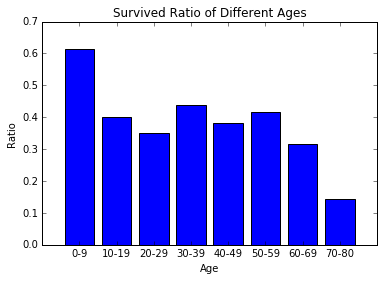

In [123]:
%pylab inline

# Compute survived ratios of each age segment
age_seg_ratio = age_seg_df.groupby('Seg')['Survived'].sum() / age_seg_df.groupby('Seg')['Survived'].count()

plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Survived Ratio of Different Ages')
plt.bar(range(8),age_seg_ratio,tick_label=tuple(age_seg_ratio.index),align ='center')
plt.show()

From this chart, we could say that passengers younger than 10-year-old were most likely to be survived.  
To verify this conclusion, I use z-test to compare group of [0,10) with [10,20),[20,30),[30,40),[40,50),[50,60),[60,70) respectively,and do not compare group of [0,10) with [70,80], because the sample size of [70,80] is too small.  
Each comparation use this hypothesis:
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:p_0 = p_1 $$
$$H_A:p_0 >= p_1 $$
Set $\alpha$ level as 0.05. In the case, $p_0$ represent the survived ratio of population with age in [0,10) , and  $p_1$ represent the survived ratio of other populations to be compared.
Here is an example of comparing group [0,10) with group [10,20):

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$n_0 = 62, y_0 = 38 ,\hat{p_0} = \frac{y_0}{n_0} = 0.61 $$
$$n_1 = 102, y_1 = 41 ,\hat{p_1} = \frac{y_1}{n_1} = 0.40 $$
$$\hat{p} = \frac{y_0 + y_1}{n_0 + n_1} = 0.48, \hat{q} = 1 - \hat{p} = 0.52 $$
$$\sigma_{(\hat{p_0}-\hat{p_1})} \approx \sqrt{\hat{p}\hat{q}(\frac{1}{n_0}+\frac{1}{n_1})} = 0.08 $$
$$Z= \frac{\hat{p_0} - \hat{p_1}}{\sigma_{(\hat{p_0}-\hat{p_1})}} = 6.5 $$  
  
 $ z_{0.05} = 1.645 $, as $Z>z_{0.05}$, the null hypothesis should be rejected . We can conclude that passengers younger than 10-year-old were more likely to be survived than those between 10 and 20.  
After doing the same test on group [0,10) with other groups, we can get the same conclusion. We can say that passengers younger than 10-year-old were most likely to be survived.

For the convenience of following computation, I write a funtion to compute the z statistic for ratio variable:

In [124]:
def z_stat_ratio_diff(n1,y1,n2,y2):
    return (1.0*y1/n1-1.0*y2/n2)/pow(1.0*(y1+y2)/(n1+n2)*(n1+n2-y1-y2)/(n1+n2)*(1.0/n1+1.0/n2),0.5)

### (2). Here are code and result investigating the correlation between survived or not and sex.  
  
I also use Chi-squared test with hypothesis:  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:\textstyle\ there\ was\ no\ correlation\ between\ survived\ or\ not\ and\ sex $$
$$H_A:\textstyle\ there\ was\ a\ correlation\ between\ survived\ or\ not\ and\ sex $$
with $\alpha$ level at 0.05.  
The contingency table of these two variables is as follow:

In [125]:
# Combine sex and survived or not into a dataframe. Then drop records with nan
sex_cleaned_df = titanic_df[['Sex', 'Survived']].dropna(axis=0)

# Use the function to gennerate the contingency table of sex and survived or not 
sex_survived_contingency = Contingency_table(sex_cleaned_df,'Sex','Survived')
sex_survived_contingency

,Survived,UnSurvived,Sum
Sex,,,
female,233,81,314
male,109,468,577
Sum,342,549,891


Then compute the Chi-squared test statistic:

In [126]:
#  Use the function to compute Chi-squared value of Chi2-test between sex and  survived or not
Chi_value_sex = Compute_Chi2(sex_survived_contingency,2,2)        
Chi_value_sex  

263.05057407065567

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
As the freedom degree is (2-1)*(2-1)=1, the Chi-squared critical value: $\chi_{0.05}^{2} = 3.84$. Obviously, the value of  $\chi^{2}$ we compute was larger than $\chi_{0.05}^{2}$.So we can reject the null hypothesis, that means there was a correlation between survived or not and sex  
  
Since we know that survived or not was related to sex. Here is another question:  
** Passengers of which sex were more likely to be survived ? **  
To answer this question, let's see the survived ratios of different sex.Here are code and result:

In [127]:
# Compute survived ratios of each sex
sex_survived_ratio = sex_cleaned_df.groupby('Sex')['Survived'].sum() / sex_cleaned_df.groupby('Sex')['Survived'].count()
sex_survived_ratio

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

From this chart, we could say that females were more likely to be survived.  
To verify this conclusion, I again use z-test with hypothesis:
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:p_0 = p_1 $$
$$H_A:p_0 >= p_1 $$
Set $\alpha$ level as 0.05. In the case, $p_0$ represent the survived ratio of female population, and $p_1$ represent the survived ratio of male population. Then compute z statistic:

In [128]:
# Use function to compute  z statistic
z_stat_ratio_diff(314,233,577,109)

16.218833930670097

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$ Z=16.22 $, as $Z>z_{0.05}$, reject the null hypothesis. We can conclude that females were more likely to be survived than males.

### (3). Here are code and result investigating the correlation between survived or not and passenger class.  
  
I also use Chi-squared test with hypothesis:  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:\textstyle\ there\ was\ no\ correlation\ between\ survived\ or\ not\ and\ pclass $$
$$H_A:\textstyle\ there\ was\ a\ correlation\ between\ survived\ or\ not\ and\ pclass $$
with $\alpha$ level at 0.05.  
The contingency table of these two variables is as follow:

In [129]:
# Combine pclass and survived or not into a dataframe. Then drop records with nan
pclass_cleaned_df = titanic_df[['Pclass', 'Survived']].dropna(axis=0)

# Use the function to gennerate the contingency table of pclass and survived or not 
pclass_survived_contingency = Contingency_table(pclass_cleaned_df,'Pclass','Survived')
pclass_survived_contingency

,Survived,UnSurvived,Sum
Pclass,,,
1,136,80,216
2,87,97,184
3,119,372,491
Sum,342,549,891


Then compute the Chi-squared test statistic:

In [130]:
#  Use the function to compute Chi-squared value of Chi2-test between pclass and  survived or not
Chi_value_pclass = Compute_Chi2(pclass_survived_contingency,3,2)        
Chi_value_pclass 

102.88898875696057

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
As the freedom degree is (3-1)*(2-1)=2, the Chi-squared critical value: $\chi_{0.05}^{2} = 5.99$. Obviously, the value of  $\chi^{2}$ we compute is larger than $\chi_{0.05}^{2}$.So we can reject the null hypothesis, that means there was a correlation between survived or not and pclass  
  
Since we know that survived or not was related to pclass. Here is another question:  
** Passengers of which pclass were most likely to be survived ? **  
To answer this question, let's see the survived ratios of different pclasses.Here are code and result:

In [131]:
# Compute survived ratios of each pclass
pclass_survived_ratio = pclass_cleaned_df.groupby('Pclass')['Survived'].sum() / pclass_cleaned_df.groupby('Pclass')['Survived'].count()
pclass_survived_ratio

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

From this chart, we could say that 1st pclass passengers were most likely to be survived.  
To verify this conclusion, I again use z-test to compare group of 1st pclass with 2nd pclass and 3rd pclass respectively. Here is the comparation of 1st pclass and 2nd pclass with hypothesis:
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:p_0 = p_1 $$
$$H_A:p_0 >= p_1 $$
Set $\alpha$ level as 0.05. In the case, $p_0$ represent the survived ratio of 1st pclass population, and $p_1$ represent the survived ratio of 2nd pclass population. Then compute z statistic:

In [132]:
# Use function to compute  z statistic
z_stat_ratio_diff(216,136,184,87)

3.146897435776384

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$ Z=3.15 $, as $Z>z_{0.05}$, the null hypothesis should be rejected. We can conclude that 1st pclass passengers were more likely to be survived than 2nd pclass.  
The comparation of 1st pclass and 3rd pclass results in the same conclusion. We can say that passengers of 1st pclass were most likely to be survived.

### (4). Here are code and result investigating the correlation between survived or not and embarked port.  
  
I also use Chi-squared test with hypothesis:  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:\textstyle\ there\ was\ no\ correlation\ between\ survived\ or\ not\ and\ embarked\ port $$
$$H_A:\textstyle\ there\ was\ a\ correlation\ between\ survived\ or\ not\ and\ embarked\ port $$
with $\alpha$ level at 0.05.  
The contingency table of these two variables is as follow:

In [133]:
# Combine embarked and survived or not into a dataframe. Then drop records with nan
embarked_cleaned_df = titanic_df[['Embarked', 'Survived']].dropna(axis=0)

# Use the function to gennerate the contingency table of embarked port and survived or not 
embarked_survived_contingency = Contingency_table(embarked_cleaned_df,'Embarked','Survived')
embarked_survived_contingency

,Survived,UnSurvived,Sum
Embarked,,,
C,93,75,168
Q,30,47,77
S,217,427,644
Sum,340,549,889


Then compute the Chi-squared test statistic:

In [134]:
#  Use the function to compute Chi-squared value of Chi2-test between embarked port and  survived or not
Chi_value_embarked  = Compute_Chi2(embarked_survived_contingency,3,2)        
Chi_value_embarked 

26.489149839237619

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
As the freedom degree is (3-1)*(2-1)=2, the Chi-squared critical value: $\chi_{0.05}^{2} = 5.99$. Obviously, the value of  $\chi^{2}$ we compute is larger than $\chi_{0.05}^{2}$.So we can reject the null hypothesis, that means there was a correlation between survived or not and embarked port
  
Since we know that survived or not was related to embarked port. Here is another question:  
** Passengers from which port were most likely to be survived ? **  
To answer this question, let's see the survived ratios of different embarked ports.Here are code and result:

In [135]:
# Compute survived ratios of each port
embarked_survived_ratio = embarked_cleaned_df.groupby('Embarked')['Survived'].sum() / embarked_cleaned_df.groupby('Embarked')['Survived'].count()
embarked_survived_ratio

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

From this chart, we could say that passengers from Cherbourg were most likely to be survived.  
To verify this conclusion, I again use z-test to compare group of Cherbourg with Queenstown and Southampton respectively. Here is the comparation of Cherbourg and Queenstown with hypothesis:
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:p_0 = p_1 $$
$$H_A:p_0 >= p_1 $$
Set $\alpha$ level as 0.05. In the case, $p_0$ represent the survived ratio of Cherbourg's passenger population, and $p_1$ represent the survived ratio of Queenstown's passenger population. Then compute z statistic:

In [136]:
# Use function to compute  z statistic
z_stat_ratio_diff(168,93,77,30)

2.3828199974549413

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$ Z=2.38 $, as $Z>z_{0.05}$,the null hypothesis should be rejected. We can conclude that passengers from Cherbourg were more likely to be survived than those from Queenstown.  
The comparation of Cherbourg and Southampton results in the same conclusion. We can say that passengers from Cherbourg were most likely to be survived.

### Conclusion  
In conlusion, passengers survived or not was related to age, sex, pclass and embarked port. In terms of age, passengers less than 10 year old were most likely to be survived. In terms of sex, femals were more likely to be survived than males. In terms of pclass, 1st class passengers were most likely to be survived. In terms of embarked port, passengers from Southampton were most likely to be survived.

## 3. Difference of age distributions in three passenger classes  
The investigation is caused by the questions:  
** Were the passengers of 1st class older than 2nd class as a whole ? **  
** Were the passengers of 2nd class older than 3rd class as a whole ? **    
  
In order to answer these questions, let's see the sample histograms of three groups.  
Here are code and histograms:

Populating the interactive namespace from numpy and matplotlib


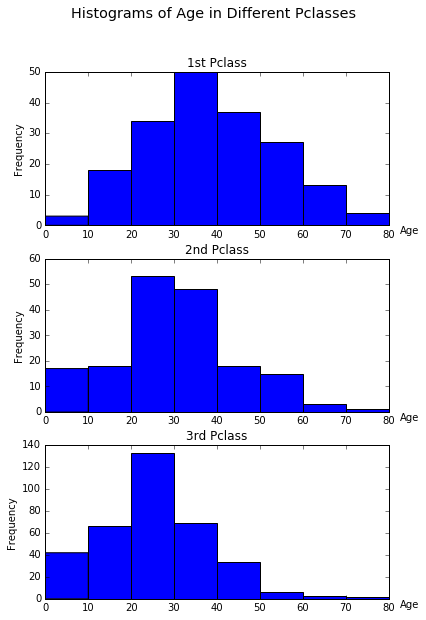

In [137]:
%pylab inline
fig = plt.figure()
fig.set_figheight(9)
st = fig.suptitle("Histograms of Age in Different Pclasses", fontsize="x-large")

ax1 = fig.add_subplot(311)
ax1.hist(titanic_df[titanic_df['Pclass']==1]['Age'], bins=8, range=(0,80))
ax1.set_title("1st Pclass")
ax1.set_xlabel('Age')
ax1.xaxis.set_label_coords(1.06, -0.005)
ax1.set_ylabel('Frequency')


ax2 = fig.add_subplot(312)
ax2.hist(titanic_df[titanic_df['Pclass']==2]['Age'], bins=8, range=(0,80))
ax2.set_title("2nd Pclass")
ax2.set_xlabel('Age')
ax2.xaxis.set_label_coords(1.06, -0.005)
ax2.set_ylabel('Frequency')

ax3 = fig.add_subplot(313)
ax3.hist(titanic_df[titanic_df['Pclass']==3]['Age'], bins=8, range=(0,80))
ax3.set_title("3rd Pclass")
ax3.set_xlabel('Age')
ax3.xaxis.set_label_coords(1.06, -0.005)
ax3.set_ylabel('Frequency')

fig.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

From sample histograms, it seems that 1st class passengers were older than 2nd class, while 2st class passengers were older than 3nd class as a whole.  
To verify this conclusion, as sample sizes of these three populations are all large enough (larger than 30), I use z-test to compare the average age of 1st class passengers and 2nd class, 2st class passengers and 3nd class respectively. Here is the comparation of 1st class and 2nd class with hypothesis:
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$H_0:\mu_0 - \mu_1 = 0 $$
$$H_A:\mu_0 - \mu_1 >= 0 $$
Set $\alpha$ level as 0.05. In the case, $\mu_0$ represent the average age of 1st class passengers' population, and $\mu_1$ represent the average age of 2nd class passengers' population.   
First, Let's compute some statistics:

In [138]:
pclass_age_df = titanic_df[['Pclass','Age']].dropna(axis=0) # Drop records with nan
pclass_age_size = pclass_age_df.groupby('Pclass').count()  # Compute amount of each pclass
pclass_age_mean = pclass_age_df.groupby('Pclass').mean()  # Compute mean age of each pclass
pclass_age_std = pclass_age_df.groupby('Pclass').std(ddof=1)  # Compute sample sd of each pclass
print 'Sample sizes:'
print pclass_age_size
print '\n Sample means:'
print pclass_age_mean
print '\n Sample standard deviations:'
print pclass_age_std

Sample sizes:
        Age
Pclass     
1       186
2       173
3       355

 Sample means:
              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620

 Sample standard deviations:
              Age
Pclass           
1       14.802856
2       14.001077
3       12.495398


Then compute z statistic:  
  
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
$$\bar{x_0} = 38.23, \bar{x_1} = 29.88 ,n_0 = 186,n_1 = 173, s_0 = 14.80, s_1 = 14.00 $$
  
$$z = \frac{\bar{x_0} - \bar{x_1}}{\sqrt{\frac{(s_0)^2}{n_0} + \frac{(s_1)^2}{n_1}}} = 5.49 $$  
  
As $ z > z_{0.05}$, the null hypothesis should be rejected. We can conclude that the average age of 1st class was larger than 2nd class.
After doing the same test on 2nd class and 3rd class, it shows the average age of 2nd class was larger than 3rd class .  
  
Besides the average of age, let's see the median, upper and lower quartiles of ages in three groups. We use box plot to show thhose three statistics:

Populating the interactive namespace from numpy and matplotlib


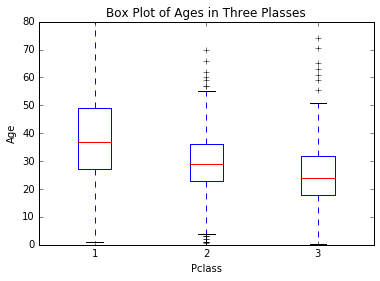

In [139]:
%pylab inline
pclass_age_df = titanic_df[['Pclass','Age']].dropna(axis=0)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Box Plot of Ages in Three Plasses')
plt.boxplot([tuple(pclass_age_df[pclass_age_df['Pclass']==1]['Age']),tuple(pclass_age_df[pclass_age_df['Pclass']==2]['Age']),tuple(pclass_age_df[pclass_age_df['Pclass']==3]['Age'])])
plt.show()

From the box plot, we can see that median, upper and lower quartiles of three groups have the same tendency: 
1st class > 2 nd class > 3rd class  

### Conlcusion  
In conclusion, 1st class passengers were older than 2nd class as a whole, while 2nd class passengers were older than 3rd class.

## Reference  
  
* https://www.kaggle.com/c/titanic/data
* http://matplotlib.org/
* https://en.wikipedia.org/wiki/Contingency_table
* https://en.wikipedia.org/wiki/Chi-squared_test
* https://onlinecourses.science.psu.edu/stat414/node/268
* http://www.stat.ucla.edu/~cochran/stat10/winter/lectures/lect21.html
* https://guides.github.com/features/mastering-markdown/
* http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference